# Life Expectancy & GDP: Portfolio Project

## Introduction

In this project, I will explore and analyse data on life expectancy and GDP for 6 different countries, and identify any relationship between the two variables. This data has been sourced from the World Health Organisation and the World Bank.

I will consider the following questions for this dataset to help with my analysis:
- What is the average life expectancy?
- What does the distribution of life expectancy look like?
- What is the average GDP?
- What does the distribution of GDP look like?
- How has life expectancy and/or GDP changed over time?
- What is the relationship between life expectancy and GDP?

#### Life expectancy

In the given data, the measurement of life expectancy for a country refers to the average life expectancy at birth. There are multiple factors that can affect an individual's life expectancy, such as genetics, health and lifestyle choices (e.g. diet, exercise), and the conditions of their environment. The average life expectancy of a country may reflect the country's overall standard of living, including the quality of, and access to, healthcare. 

#### GDP

GDP stands for 'Gross Domestic Product', and is a standard measure of the value of the production of all goods and services within a set time period. The GDP of a country is often used as a measurement for the size of its economy, and can be monitored over time to observe the growth of the economy. 

## Import Python libraries

First, I need to import the Python libraries that I will be using for my data analysis. 

In [78]:
# Import necessary Python libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data into Python

Next, I need to load the CSV file 'all_data.csv', which contains the data on life expectancy and GDP, into a Pandas DataFrame.

In [80]:
# Load CSV file into 'df':
df = pd.read_csv('all_data.csv')

## Summary of Data

I can now start to explore the data by printing a summary of information about the DataFrame, and looking at the first 5 rows.

In [82]:
print(df.info()) # prints information about 'df'
df.head() # returns first 5 rows of 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


From this, we can see that there are 96 rows of data, and 4 columns, with no missing values.

The columns consist of the following:
- Country
- Year
- Life expectancy at birth (years)
- GDP (U.S. dollars)

We can also find which 6 countries are included in this data, and the years that the observations were taken, by creating a list of distinct values for both country and year:

In [84]:
# Create list of countries:
countries = df['Country'].unique() # returns the unique values for 'country' in 'df'
print("Countries: " + str(countries))

# Create list of years:
years = df['Year'].unique() # returns the unique values for 'year' in 'df'
print("Years of observations: " + str(years))

Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years of observations: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


I would now like to clean the data to make it both easier to work with, and clearer to interpet. I will do the following:
- Change the format of GDP values to be in billions of dollars
- Rename the columns
- Replace 'United States of America' with 'USA'

In [86]:
# Change format of 'GDP' values to be in billions:
df['GDP'] = df['GDP'].apply(lambda x: x/(10**12))

# Rename columns to make it easier to work with:
df.columns = ['country', 'year', 'life_expectancy', 'gdp_tril']

# Rename country 'United States of America' as 'USA':
df.replace("United States of America", "USA", inplace = True)

# Update the created list of countries to include 'USA' instead:
countries = df.country.unique()

## Data Analysis & Visualisations

In my analysis, I will initially be looking at the average values, as well as the distribution of values, for both life expectancy and GDP in the dataset. In order to explore the average values, I am going to create a function, which will find the overall average value and averages for each country, and then plot the average values for each country as a bar chart, with a horizontal line representing the overall average value drawn across the plot. I can then apply this function to the columns for life expectancy and GDP in the dataset.

In [88]:
# Define function 'explore_mean' to find and plot average values for a given column in 'df':

def explore_mean(column_name, observation, measurement):
                    # 'column_name' will either be 'life_expectancy' or 'gdp_tril'
                    # 'observation' will be either be 'life expectancy' or 'GDP'
                    # 'measurement' will either be 'years' or 'trillion dollars'

    # Calculate the mean value of 'column_name' in 'df':
    overall_mean = df[column_name].mean()
    
    # Print statement of overall mean for 'observation', rounded to nearest 2d.p. in 'measurement'
    print("The overall mean {} is {} {}.".format(observation, str(round(overall_mean, 2)), measurement))

    # Calculate the mean values of 'column_name' in 'df' for each country:
    mean_country = df.groupby('country')[column_name].mean().sort_values(ascending = False)
                    # calculates the aggregated mean for 'column_name' grouped by 'country'
                    # sorts the mean values for each country in descending order
    
    # Print statement of mean 'observation' for each country:
    print("The mean {} for each country:".format(observation))
    for i in range(6):
        print("{}: {} {}".format(mean_country.index[i], round(mean_country.values[i], 2), measurement))
                # iterates through each index in Series 'mean_country'
                # prints the name & mean value for each country

    # Plot bar chart to show comparison of mean 'column_name' for each country:
    sns.barplot(data = df, x = 'country', # plots the distinct values of 'country' in 'df' as categories on the x-axis
                y = column_name, # plots the corresponding aggregated mean values of 'column_name' on the y-axis
                order = mean_country.index, # sorts the order of the bars to be in descending order
                errorbar = None) # disables the error bars

    # Draw a horizontal line for overall mean across the plot
    plt.axhline(y = overall_mean, # draws the line 'y = overall_mean'
                color = 'red', # sets the colour of line as 'red'
                label = "Overall mean {}".format(observation)) # provides a label for the legend

    # Place legend outside of axes:
    plt.legend(loc = 2, bbox_to_anchor = (1, 1))
                # places the upper left corner of legend near coordinates (1, 1) on the axes 

    plt.xlabel("Country") # sets the label for the x-axis
    plt.ylabel("Mean {} ({})".format(observation, measurement)) # sets the label for the y-axis
    plt.title("Mean " + str(observation.title())) # sets the title for the figure
    plt.show() # displays the figure
    plt.clf() # clears the figure

### Average Life Expectancy

First, I will explore the average life expectancy by applying my function 'explore_mean' to the column values for 'life_expectancy' in the dataset.

The overall mean life expectancy is 72.79 years.
The mean life expectancy for each country:
Germany: 79.66 years
Chile: 78.94 years
USA: 78.06 years
Mexico: 75.72 years
China: 74.26 years
Zimbabwe: 50.09 years


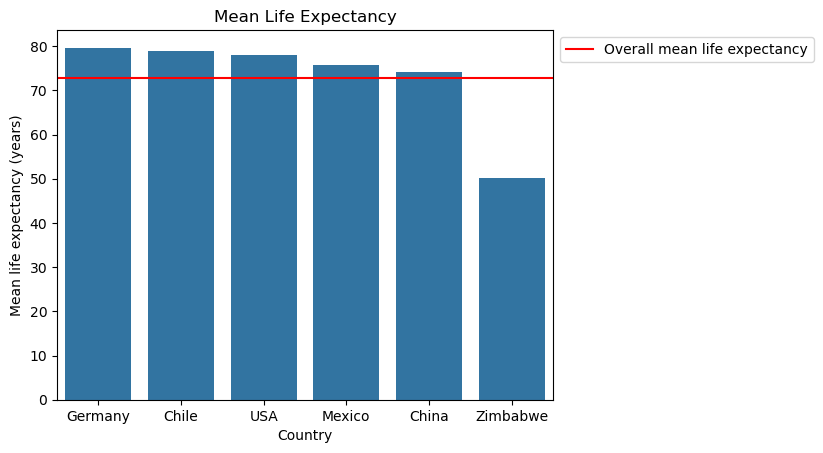

<Figure size 640x480 with 0 Axes>

In [90]:
explore_mean('life_expectancy', 'life expectancy', 'years')

From the calculations of the mean, and looking at the bar chart for mean life expectancy, we can see that for our dataset...
- The overall average life expectancy is 72.8 years
- Zimbabwe has the lowest average life expectancy of 50.1 years
- Germany has the highest average life expectancy of 79.7 years
- All of the countries, apart from Zimbabwe, have an average life expectancy that is higher than the overall mean, which suggests that Zimbabwe is bringing down the total average life expectancy

### Distribution of Life Expectancy

I want to explore the distribution of life expectancy in the dataset by, firstly, visualising the overall distribution for all the countries in a box plot.

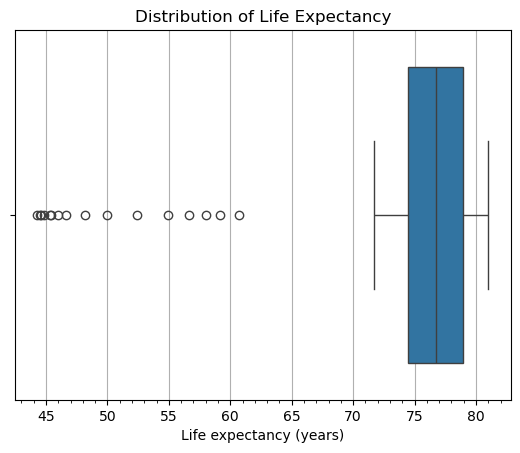

<Figure size 640x480 with 0 Axes>

In [93]:
# Draw a box plot to show distribution of 'life_expectancy' values in 'df':
sns.boxplot(data = df, x = 'life_expectancy')

# Draw vertical grid lines for better readability:
plt.grid(visible = True, axis = 'x') # configures the grid lines for the x-axis

plt.minorticks_on() # displays the minor ticks on the axes
plt.xlabel("Life expectancy (years)") 
plt.title("Distribution of Life Expectancy") 
plt.show() 
plt.clf() 

From the above box plot, we can see...
- Many outliers on the left, where life expectancy is signficantly lower than the rest of the values
- The median value of life expectancy is around 77 years
- The IQR/middle spread of life expectancy ranges from just below 75 years to approximately 79 years
- The highest value of life expectancy is 81 years, and the lowest (excluding outliers) is near 72 years

To get a better understanding of this distribution, and explain the outliers of the data, we can look at the distribution of life expectancy for each country. We can draw side-by-side box plots to compare the distributions.

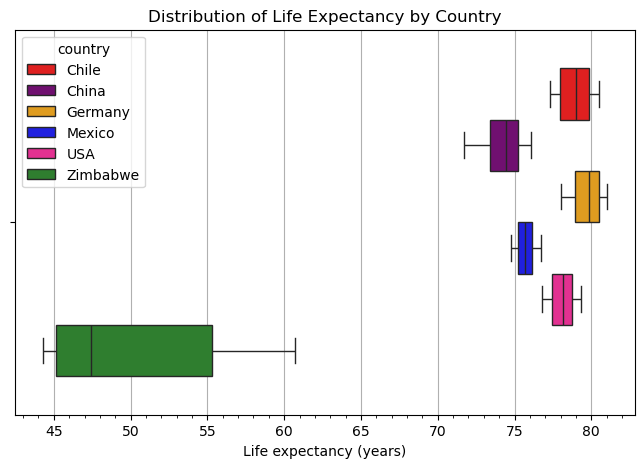

<Figure size 640x480 with 0 Axes>

In [95]:
# Select a list of colours to use for the palette in plotting:
palette = ['red', 'purple', 'orange', 'blue', 'deeppink', 'forestgreen']

plt.figure(figsize = (8, 5)) # creates a figure, and sets the figure size in inches (width, height)

# Draw side-by-side box plots to show distribution of 'life_expectancy' in 'df' grouped by 'country':
sns.boxplot(data = df, x = 'life_expectancy',
            hue = 'country', # groups the 'life_expectancy' values by 'country', & colour encodes each boxplot
            palette = palette) # sets the colour palette for the boxplots

plt.minorticks_on()
plt.grid(visible = True, axis = 'x') 
plt.title("Distribution of Life Expectancy by Country") 
plt.xlabel("Life expectancy (years)") 

plt.show() 
plt.clf() 

From these side-by-side box plots, we now have a better understanding of the overall distribution of life expectancy. 

The outliers in the first box plot represent the distribution of life expectancy for Zimbabwe, which has significantly lower values than of the other countries. We can also see that Zimbabwe has the largest range of life expectancy values compared to the other countries. From this, we can infer that, for this dataset, Zimbabwe has the lowest overall life expectancy, but also the highest range of years in life expectancy.
  
Since the box plot for Zimbabwe is placed much lower on the x-axis than the other boxplots, it affects the x-axis limits, making it difficult to clearly compare the distributions for the other countries. To solve this, we can draw another set of side-by-side box plots for each country, excluding Zimbabwe, in order to limit the range of values for the x-axis.

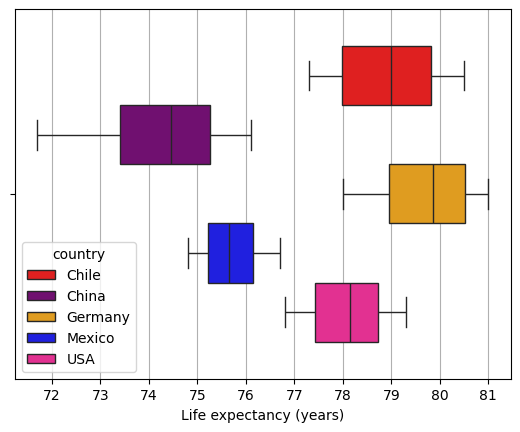

<Figure size 640x480 with 0 Axes>

In [97]:
sns.boxplot(data = df[df.country != 'Zimbabwe'], # Excludes data for Zimbabwe when plotting 'df' values
            x = 'life_expectancy', hue = 'country',
            palette = palette[:-1]) # sets the colour palette as the previous one used, without the colour used for Zimbabwe

plt.xticks(range(72, 82)) # changes the tick locations on the x-axis to be for every integer
plt.grid(visible = True, axis = 'x') 
plt.xlabel("Life expectancy (years)")
plt.show()
plt.clf()

Looking at this updated side-by-side box plot, we find that, for the five other countries in the dataset:
- Mexico has the smallest range for life expectancy
- China has the largest range for life expectancy
- Germany has the highest maximum life expectancy at 81 years, and also has the highest minimum at 78 years.
- China has the lowest maximum life expectancy at around 76 years, and also has the lowest minimum below 72 years.

### Average GDP

Next, I want to look at the average GDP in the dataset. I can do this by applying the previously created function 'explore_mean' to the column values for 'gdp_tril'.

The overall mean G.D.P. is 3.88 trillion dollars.
The mean G.D.P. for each country:
USA: 14.08 trillion dollars
China: 4.96 trillion dollars
Germany: 3.09 trillion dollars
Mexico: 0.98 trillion dollars
Chile: 0.17 trillion dollars
Zimbabwe: 0.01 trillion dollars


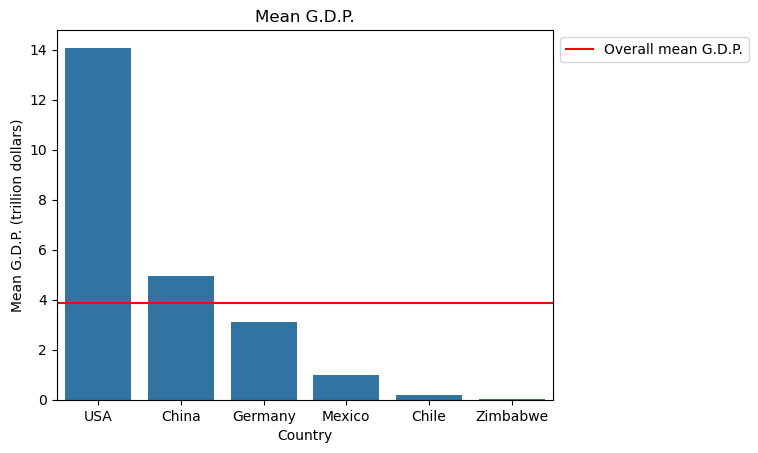

<Figure size 640x480 with 0 Axes>

In [100]:
explore_mean('gdp_tril', 'G.D.P.', 'trillion dollars')

From the calculations of the mean, and by looking at the bar chart for mean GDP, we can see that...
- The overall average GDP is 3.88 trillion dollars
- USA has the highest average GDP of 14.08 trillion dollars, which is 9 trillion dollars more than China's average (the second highest average GDP)
- Zimbabwe has the lowest average GDP of 0.01 trillion (or 10 billion) dollars
- Both China and Germany have average GDP values that are the closest to the overall average GDP.

### Distribution of GDP

I will use a histogram to look at the total distribution of GDP for the six countries in the dataset.

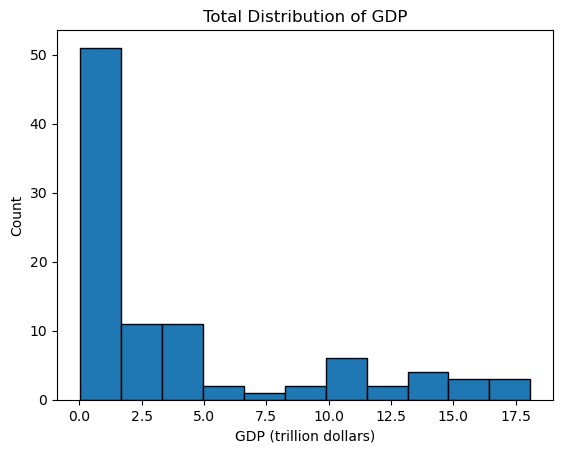

<Figure size 640x480 with 0 Axes>

In [103]:
# Plot a histogram to show the distribution of 'gdp_tril' values in 'df':
sns.histplot(data = df,
             x = 'gdp_tril', alpha = 1) # values of 'gdp_tril' on x-axis
                            # number of observations for each bin (interval of 'gdp_tril' values) on y-axis
plt.xlabel("GDP (trillion dollars)")
plt.title("Total Distribution of GDP")
plt.show()
plt.clf()

From this histogram, we can see that the overall distribution of GDP is very right-skewed, since a large amount of data is clustered in one bin on the far left of the histogram. To get a better understanding, we can plot multiple histograms on the same axes, comparing the different distributions of GDP for each country.

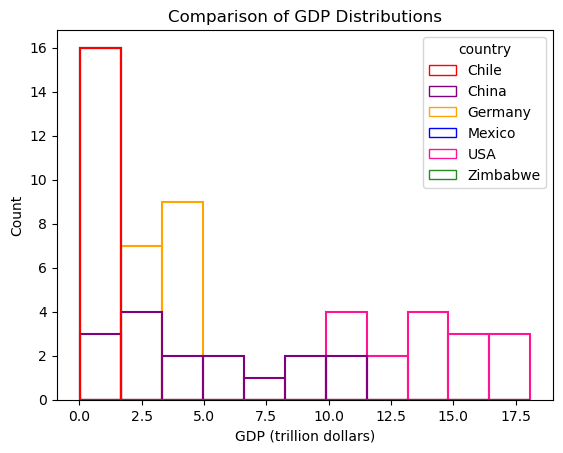

<Figure size 640x480 with 0 Axes>

In [105]:
# Plot histogram to show distribution of 'gdp_tril' in 'df' grouped by 'country':
sns.histplot(data = df, x = 'gdp_tril',
             hue = 'country', # groups the 'gdp_tril' values by 'country', & colour encodes each histogram
             palette = palette, # sets the colour palette for the histograms
             fill = False) # draws only the outline of the bins
plt.xlabel("GDP (trillion dollars)")
plt.title("Comparison of GDP Distributions")
plt.show()
plt.clf()

By looking at the above histogram plot, we can see that...
- USA has the highest GDP in this dataset
- USA and China have distributions of GDP with a wider spread of values compared to that of the other countries
- The distributions for Chile, Mexico, and Zimbabwe all have such a small spread of values that they blend into one bin on the histogram

We can plot another histogram to show the individual distributions of GDP for Chile, Mexico and Zimbabwe more clearly.

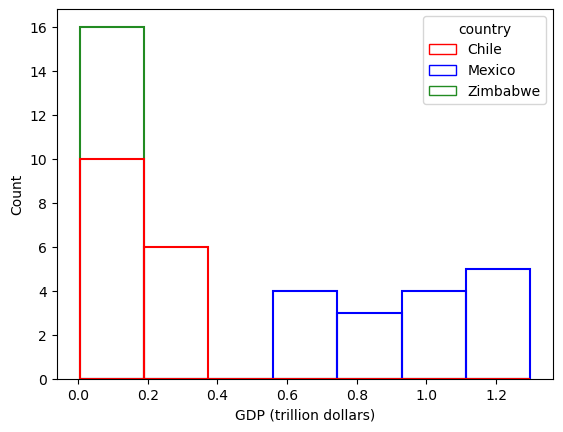

<Figure size 640x480 with 0 Axes>

In [107]:
# Plot histogram to show distributions of 'gdp_tril' for Chile, Mexico & Zimbabwe only:
sns.histplot(data = df[df.country.isin(["Chile", "Mexico", "Zimbabwe"])], # filters the dataset
             x = 'gdp_tril', hue = 'country', # plots distribution of 'gdp_tril' grouped by 'country'
             palette = ["red", "blue", "forestgreen"], 
             fill = False)
plt.xlabel("GDP (trillion dollars)")
plt.show()
plt.clf()

From this histogram, we can see that for this dataset...
- Mexico has an overall higher GDP, and wider spread of GDP values, than Chile and Zimbabwe
- Zimbabwe has the lowest overall GDP, as well as the smallest spread of GDP values

### Trends over Time

I want to look at the trends of both life expectancy and GDP over time by drawing line plots. I can create a function that will draw a line plot showing given column values from 'df' for each year between 2000 and 2015, grouped by country. This will allow me to compare time series data amongst the six countries in the dataset for both life expectancy and GDP.

In [110]:
# Create function 'draw_time_series' to draw a line plot for trend of given column values over time:
def draw_time_series(column_name, observation, measurement):
    sns.lineplot(data = df, x = 'year', y = column_name, # draws a line plot with 'year' on x-axis, & 'column_name' on y-axis
                 hue = 'country', palette = palette) # groups data by 'country', & draws different coloured line for each country
    plt.grid(alpha = 0.2) # configures & shows grid lines
    plt.legend(bbox_to_anchor =(1.05, 1), borderaxespad = 0, title = 'Country') # places the legend outside of the axis
    plt.xlabel("Year")
    plt.xticks(years, rotation = 45) # sets the ticks on x-axis as each year, & rotates tick-labels by 45 degrees
    plt.ylabel(observation + measurement)
    plt.title(str(observation) + " Over Time")
    plt.show()
    plt.clf()

Using the function 'draw_time_series', I will, firstly, look at the trend of life expectancy over time for each country.

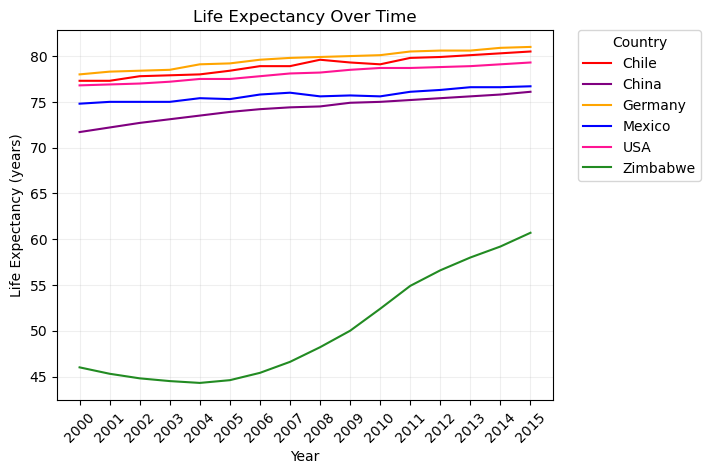

<Figure size 640x480 with 0 Axes>

In [112]:
# Draw lineplot to show trends of life expectancy over time:
draw_time_series('life_expectancy', 'Life Expectancy', ' (years)')

From the above time series plot for life expectancy, it appears that, for the majority of the countries in the dataset, life expectancy has gradually increased between 2000 and 2015. We can also see that, for Zimbabwe, life expectancy was gently declining from 2000 until 2004, and then began to rise every year until 2015, where it reached around 60 years. Overall, Zimbabwe appears to have the largest increase in life expectancy over time.

Next, I will use the function 'draw_time_series' to explore how GDP changes over time for each country in the dataset. 

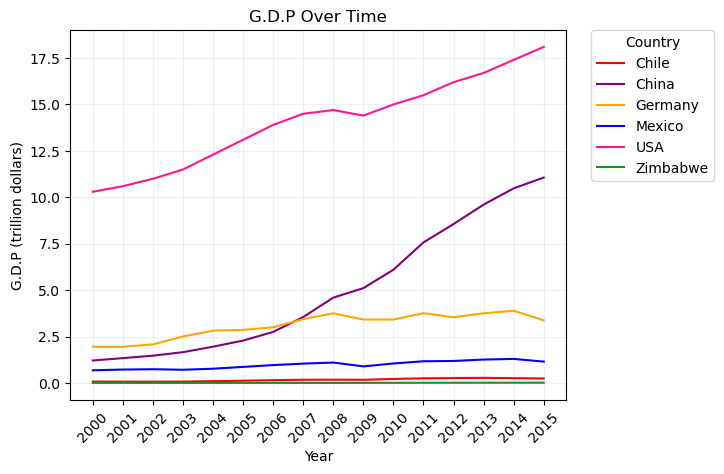

<Figure size 640x480 with 0 Axes>

In [114]:
# Draw lineplot to show trends of GDP over time:
draw_time_series('gdp_tril', "G.D.P", " (trillion dollars)")

From the above time series plot for GDP, we can clearly see that, China and USA have the largest overall increase in GDP.
For the other countries in the dataset, it appears that there is no significant change in GDP over the years, but, since their values of GDP are much lower than for China and USA, the y-axis limits makes it difficult to spot any trend from the lines for those countries.

To expand upon the analysis of the trends over time, I want to draw a line plot for each country in the dataset, comparing the time series of both life expectancy and GDP. In order to do this, I will create an initial figure, and then use a 'for loop' to iterate through the six countries, adding a subplot for each country to the figure. Each subplot contains two independent y-axes for a shared x-axis, showing life expectancy and GDP over time as two separate line plots on one axes. This will allow us to not only compare the trends in the time series between each country in the dataset, but also easily compare the trends of life expectancy for each country to the trends of GDP.

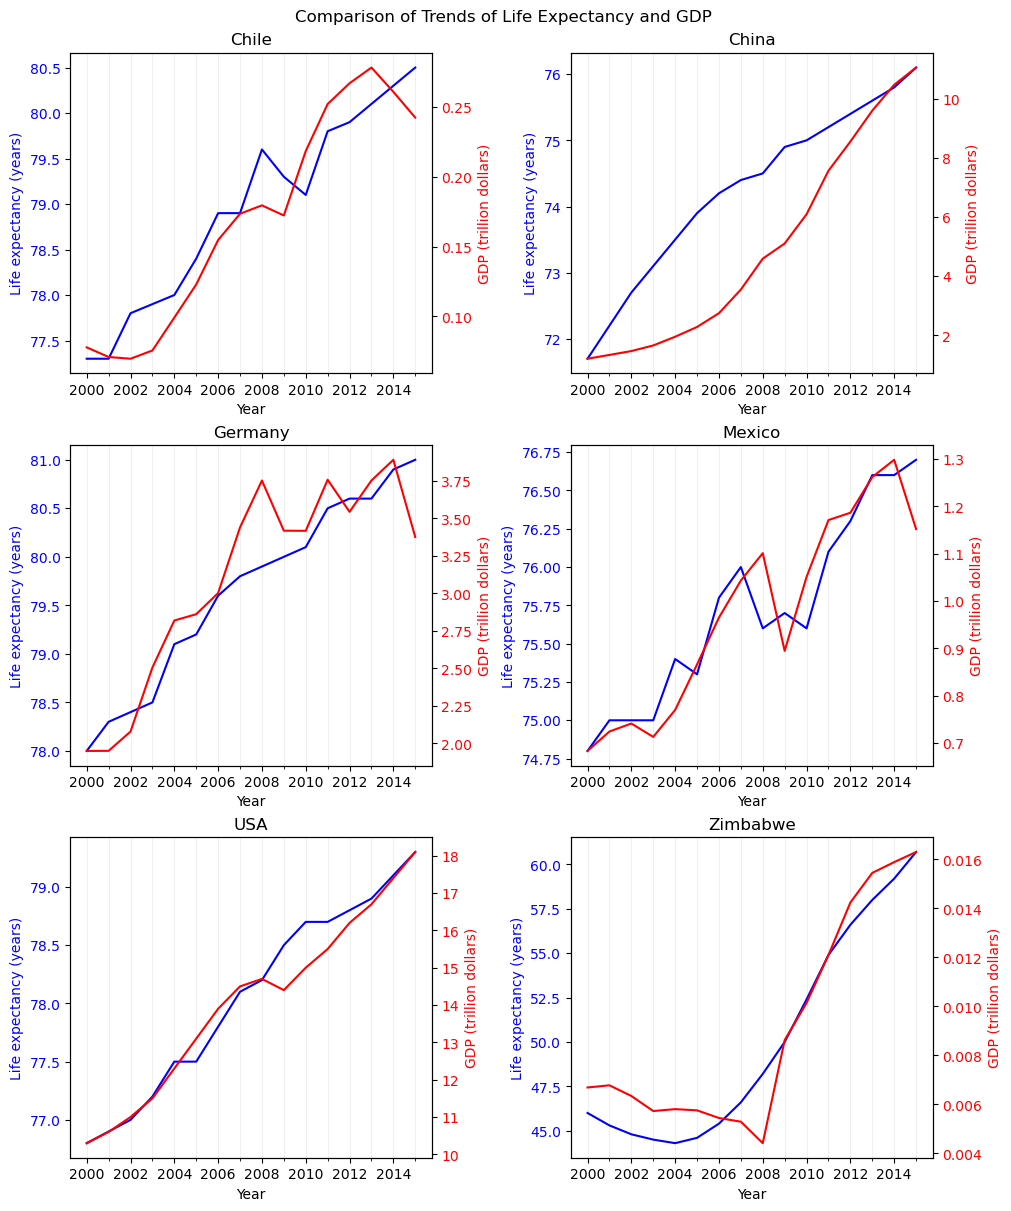

<Figure size 640x480 with 0 Axes>

In [116]:
# Plot times series for life expectancy & GDP for each country:

# Create a figure to add subplots to:
plt.figure(figsize = (10, 12), layout = 'constrained') 
            # adjusts size of figure
            # adjusts layout mechanism for subplots in figure

# Create for loop to plot subplot for each country:
for i in range(6): # iterates through numbers 0-5 to use as indices 

    # Assign 'df' values to variable 'data' for each country:
    data = df[df.country == countries[i]] # uses 'i' as index to retrieve each country name in list of countries

    # Create a subplot 'ax1':
    ax1 = plt.subplot(3, 2, i+1)
            # grid of subplots has 3 rows & 2 columns
            # creates subplot for position 'i+1' in grid

    # Draw a line plot for life expectancy over time:
    ax1.plot(data.year, data.life_expectancy, # plots values from 'data' of 'year' on x-axis, & 'life_expectancy' on y-axis
             color = 'blue', # sets colour of line for life expectancy as blue
             label = 'Life expectancy') # creates a label for the legend
    plt.xlabel("Year") 
    ax1.set_xticks(range(2000, 2015, 2)) # sets the major x-ticks to be for every other year (the even years) between 2000 & 2015
    ax1.set_xticks(data.year, minor = True) # sets the minor x-ticks to be for every year

    # Set the colour of y-axis labelling for life expectancy as blue:
    plt.ylabel("Life expectancy (years)", color = 'blue') 
    ax1.tick_params(axis = 'y', labelcolor = 'blue') 

    # Configure & show the grid lines for the x-axis:
    plt.grid(axis = 'x', which = 'both', alpha = 0.2) 

    # Create a twin axes 'ax2':
    ax2 = ax1.twinx() # shares x-axis with 'ax1', but has independent y-axis

    # Draw a line plot for GDP over time:
    ax2.plot(data.year, data.gdp_tril, # plots values from 'data' of 'year' on x-axis, & 'gdp_tril' on y-axis
             color = 'red', # sets colour of line for GDP as red
             label = 'GDP') 

    # Set the colour of y-axis labelling for GDP as red:
    plt.ylabel("GDP (trillion dollars)", color = 'red') 
    ax2.tick_params(axis = 'y', labelcolor = 'red')

    # Create a title for each subplot:  
    plt.title(countries[i]) 

plt.suptitle("Comparison of Trends of Life Expectancy and GDP ") # creates 'super' centered title for whole figure
plt.show()
plt.clf()

Looking at the above time series plots, it appears that...
- There is definitely an overall increase in both life expectancy and GDP between 2000 and 2015 for every country in the dataset
- USA has the most consistent trends in life expectancy and GDP out of all the countries in the dataset, as both of them seem to generally be increasing at a near constant rate. The similarity between both lines also suggest there is a strong relationship between life expectancy and GDP in the US.
- For Mexico, the rates of change for life expectancy and GDP are both quite inconsistent, but the trend patterns are similar between the two variables. There is also a noticable dip in the values for both variables between the years 2008 and 2010.
- In Germany, GDP was rising in value until 2008, declined in 2009, and then was intermittently increasing and decreasing over the years.
- In Chile, Germany, and Mexico, GDP declined between 2014 and 2015, but life expectancy continued to increase
- Between 2008 and 2009, there was some sort of change for either life expectancy or GDP, or both, in every country in the dataset. For most countries, there was a noticeable decline in GDP, with Chile also facing a drop in life expectancy, whilst life expectancy in China increased at a higher rate, and Zimbabwe experienced a significant rise in GDP after 2008.

These observations may leave us with some questions to consider for further analysis, such as if any significant events were impacting the changes in trends, especially in 2008.

I also want to consider the average values of life expectancy and GDP per year, and plot these values as a time series. 

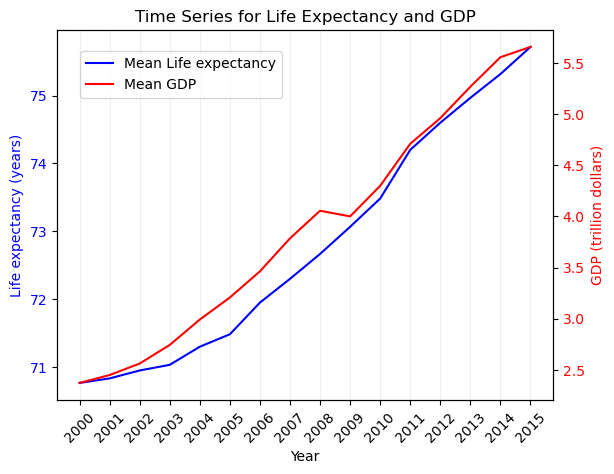

<Figure size 640x480 with 0 Axes>

In [118]:
# Average life expectancy & GDP time series:

# Create list of mean values of life expectancy per year:
mean_life_expectancy_year = df.groupby('year').life_expectancy.mean().values
                            # calculates the mean of 'life_expectancy' values in 'df' grouped by 'year'

# Create list of mean values of GDP per year:
mean_GDP_year = df.groupby('year').gdp_tril.mean().values
                # calculates the mean of 'gdp_tril' values in 'df' grouped by 'year'

# Create figure 'fig' & axes 'ax1':
fig, ax1 = plt.subplots()

# Draw a line plot for average life expectancy over time:
ax1.plot(years, mean_life_expectancy_year, color = 'blue', label = 'Mean Life expectancy')
plt.xticks(years, rotation = 45)
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)", color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')
plt.grid(axis = 'x', alpha = 0.2)

# Create a twin axes 'ax2':
ax2 = ax1.twinx()

# Draw a line plot for average GDP over time:
ax2.plot(years, mean_GDP_year, color = 'red', label = 'Mean GDP')
plt.ylabel("GDP (trillion dollars)", color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

fig.legend(loc = 2, bbox_to_anchor = (0.15, 0.85))
plt.title("Time Series for Life Expectancy and GDP")
plt.show()
plt.clf()


The above time series plot shows that, on average, both life expectancy and GDP have increased over time, for the given dataset. GDP appears to increase at a slightly higher rate than life expectancy, and also drops by a small amount in 2009, but, overall, the average rates of change for both the variables seem quite consistent. The similarity in trends for life expectancy and GDP may lead us to question the possibility of a relationship between the two.

### Relationship between Life Expectancy & GDP

Lastly, I am going to look at the relationship between life expectancy and GDP for each country in the dataset, and identify any possible correlation between the two variables. In order to do this, I will draw a scatter plot of the values of life expectancy against the values of GDP for each country onto a Seaborn FacetGrid.

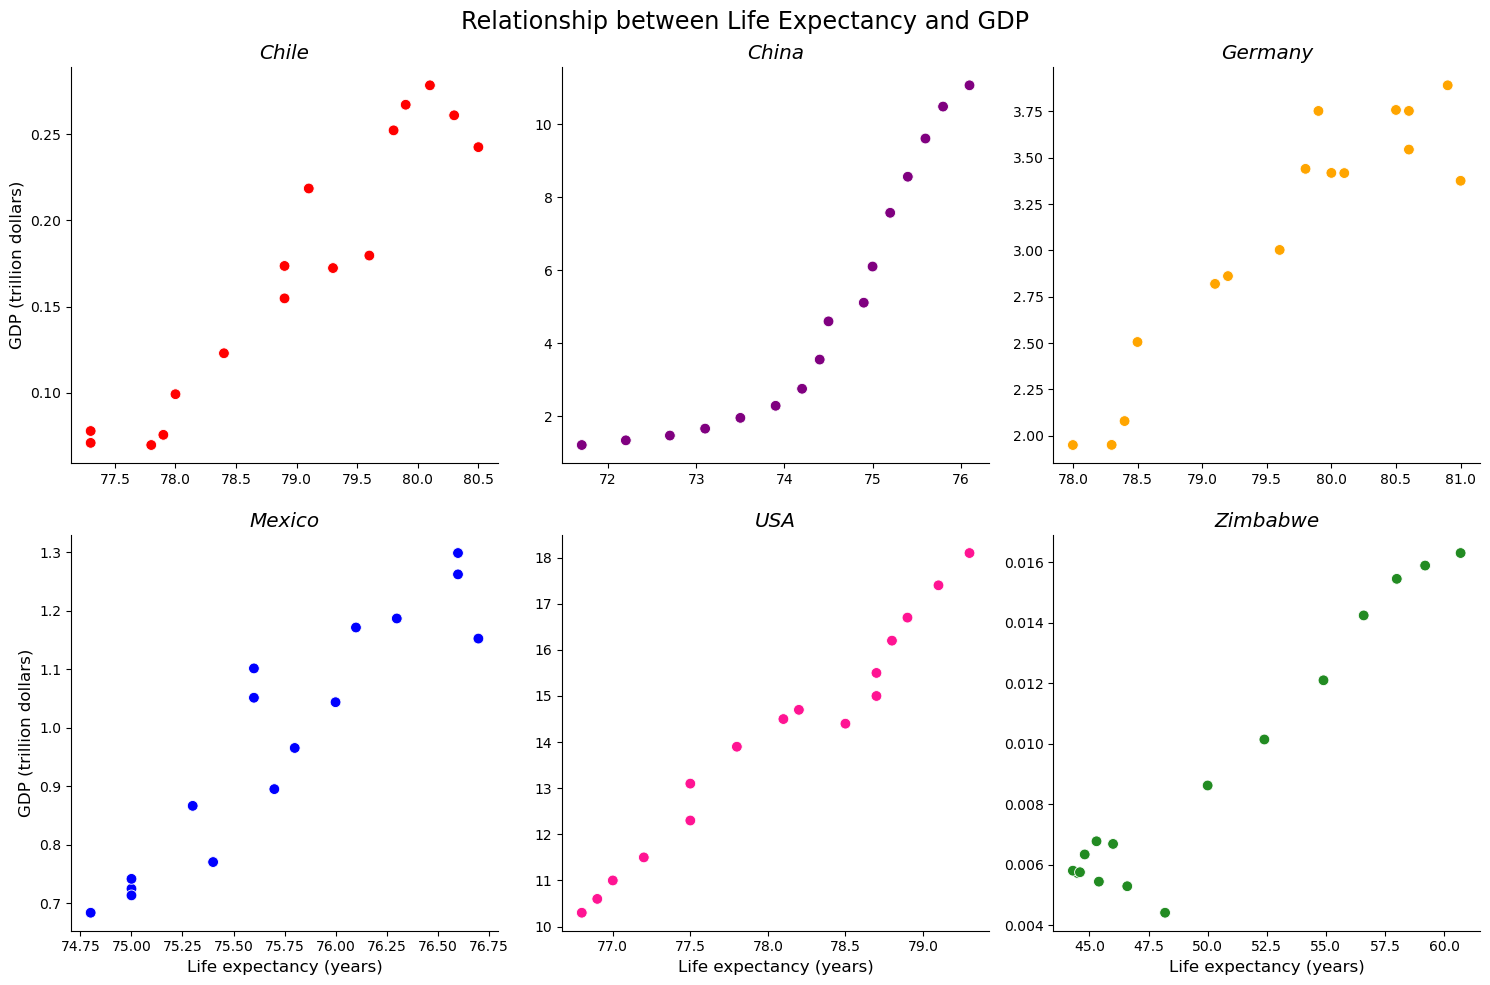

<Figure size 640x480 with 0 Axes>

In [121]:
# Draw relational (scatter) plot of life expectancy & GDP for each country:
g = sns.relplot(data = df, x = 'life_expectancy', # plots 'life_expectancy' in 'df' on x-axis
                y = 'gdp_tril', # plots 'gdp_tril' in 'df' on y-axis
                col = 'country', # sets 'country' as grouping column variable to draw on separate facets in grid
                col_wrap = 3, # wraps 'col' at 3 columns, so facets span multiple rows
                hue = 'country', # sets 'country' as grouping variable for colour encoding
                palette = palette, # assigns pre-defined colour palette 
                legend = False, # suppresses the legend 
                s = 60, # increases the size of the markers
                facet_kws = dict(sharex = False, sharey = False)) # sets different axes limits & tick positions for each facet

g.set_axis_labels("Life expectancy (years)", "GDP (trillion dollars)", size = 'large') # creates labels for x-/y-axes
g.set_titles("{col_name}", size = 'x-large', style = 'oblique') # creates title for each facet
g.figure.suptitle("Relationship between Life Expectancy and GDP", fontsize = 'xx-large') # creates 'super' centered title for entire 
g.tight_layout(h_pad = 1.8) # adjusts positioning of facets in grid
plt.show()
plt.clf()

From these scatterplots, we can see that there is some sort of positive linear relationship between life expectancy & GDP for each country, since higher values of life expectancy generally appear to be associated with higher values of GDP. The scatterplots also appear to show that for life expectancy and GDP in the dataset...
- USA has the strongest positive association between them
- Zimbabwe's relationship between them is negative when life expectancy is less than 50 years, but becomes positive when life expectancy is over 50 years
- For China, the association starts off as weak, and becomes slightly stronger as life expectancy increases

We can also quantify the strength of these associations by measuring the Pearson correlation between life expectancy and GDP for each country.

In [123]:
# Import scipy.stats method 'pearsonr' in order to calculate the Pearson correlation:
from scipy.stats import pearsonr

print("Correlation coefficient for the linear relationship between life expectancy and GDP:")

for country in countries: # iterates through list of countries
    life_expectancy = df[df.country == country].life_expectancy # creates list of 'life_expectancy' values for each country
    gdp_tril = df[df.country == country].gdp_tril # creates list of 'gdp_tril' values for each country

    # Calculate correlation for relationship between 'life_expectancy' & 'gdp_tril':
    correlation, p = pearsonr(life_expectancy, gdp_tril) 
    # returns computed Pearson correlation coefficient 'correlation' & p-value 'p'

    print("{}: {}".format(country, round(correlation, 4))) # prints name & correlation coefficient (rounded to 4d.p.) for each country

Correlation coefficient for the linear relationship between life expectancy and GDP:
Chile: 0.9499
China: 0.9085
Germany: 0.9327
Mexico: 0.9322
USA: 0.9817
Zimbabwe: 0.9662


By calculating the correlation coefficients for each country's relationship between life expectancy and GDP, we find that...
- For every country, the correlation is over 0.9, which suggests a very strong linear association
- USA has the highest correlation of 0.98, which we had previously deduced from the scatterplots
- China has the lowest correlation of 0.91

## Summary & Conclusions

In this dataset, we have found that...
- Germany has the highest average life expectancy, which may suggest that the standards of living, and quality of healthcare, in Germany are higher than in the other countries.
- Zimbabwe has the lowest average life expectancy, which may suggest that Zimbabwe has lower standards of living, and a poor heathcare system. However, Zimbabwe also has the biggest increase in life expectancy in the observed time period, which could indicate that there is a high rate of improvement in its living standards and healthcare systems.
- The US has the highest average GDP, suggesting that it has the largest economy, and is the wealthiest out of all six countries.
- Zimbabwe has the lowest average GDP, indicating that it has the smallest economy, and is the poorest country.
- Both China and USA have a significant rise in GDP in the observed period of time, meaning that both countries' economies are growing at a very high rate, and they are becoming wealthier over time.
- Overall, life expectancy has increased over time. This is likely due to improvements in global health, which includes increased access to health care, clean water, sanitation, and vaccines. GDP has also increased over time, which may be due to global socioeconomic advancements, including the reduction in poverty rates, or a rise in employment rates.
- There is a strong positive correlation between life expectancy and GDP for each country, meaning that a larger value of life expectancy is highly associated with a larger value of GDP. This suggests that life expectancy and GDP could be linked to each other, which would explain why both are shown to have increased over time. If they are related, then the life expectancy of a country affects its GDP, and/or vice versa. This suggests that wealthier countries, with higher GDPs, are more likely to be healthier, due to higher life expectancies, and poorer countries, with lower GDPs, are more likely to be less healthy, due to lower life expectancies.

## Limitations

The analysis in this project only focuses on the data for six countries, in a limited time period between 2000 and 2015. Thus, it does not represent the entire world population, and does not provide information on life expectancy and GDP for the years outside of this interval of time. In order to answer the question of whether life expectancy and GDP are related univerisally, the sample size of the observations would have to be much larger, such as by taking data from more countries, and taking data from a larger period of time. 

There are also more areas for further research and analysis that can help to explain the findings for life expectancy and GDP in the dataset. We may want to look at other health statistics for each country, such as obesity rates, infant mortality rates, and the proportion of the population with sufficient access to clean water or sanitation services. We could also look at other statistics to monitor each country's socioeconomic status, such as poverty rates, unemployment rates, and average levels of education. All these other statistics can provide a more detailed analysis into life expectancy and GDP, as we could identify the possible factors for the growth of, and relationship between, life expectancy and GDP in the dataset. 